In [1]:
library(ggplot2)

In [2]:
## In this example, the data is in a matrix called data.matrix
## columns are individual samples (i.e. cells)
## rows are measurements taken for all the samples (i.e. genes)


data.matrix <- matrix(nrow=100, ncol=10)
colnames(data.matrix) <- c(paste("wt", 1:5, sep=""), paste("ko", 1:5, sep=""))
rownames(data.matrix) <- paste("gene", 1:100, sep="")

for (i in 1:100) {
  wt.values <- rpois(5, lambda=sample(x=10:1000, size=1))
  ko.values <- rpois(5, lambda=sample(x=10:1000, size=1))
 
  data.matrix[i,] <- c(wt.values, ko.values)
}

In [3]:
head(data.matrix)

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,68,68,76,71,81,411,404,414,416,389
gene2,75,63,69,70,66,987,998,971,977,1028
gene3,961,1009,1033,965,982,180,147,159,160,149
gene4,664,694,686,733,687,436,427,394,424,425
gene5,695,708,648,756,681,804,766,801,765,816
gene6,968,988,1013,1005,937,714,702,755,697,755


In [4]:
dim(data.matrix)

[1] 100  10

In [5]:
## t() transpose of data.matrix is done because prcomp() assumes that samples are rows and dimensions are columns

pca <- prcomp(t(data.matrix), scale=TRUE) 

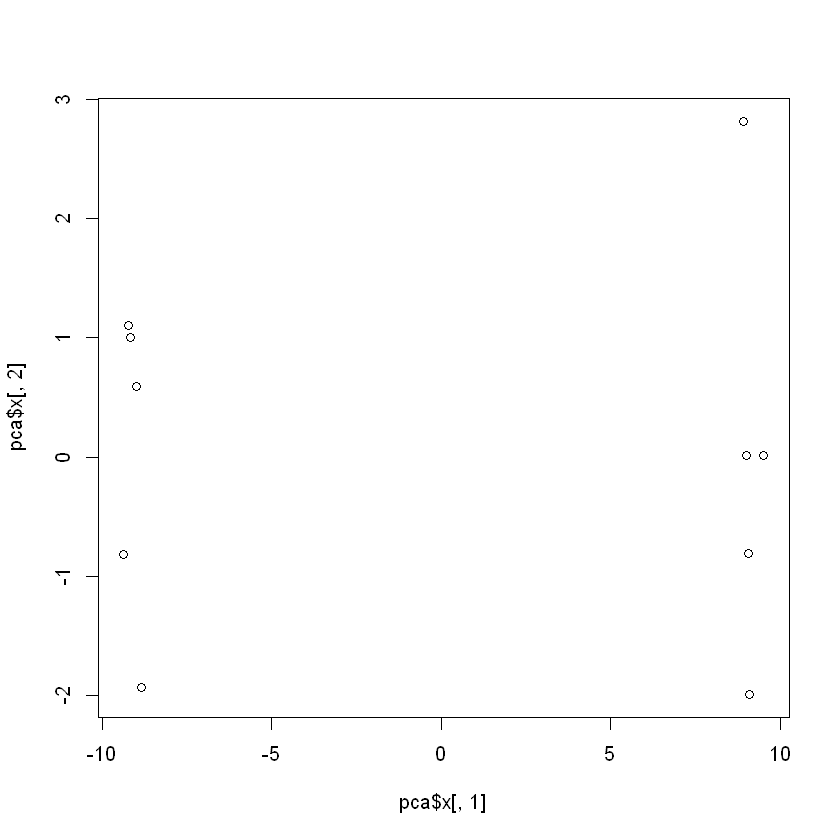

In [6]:
## plot pc1 and pc2

plot(pca$x[,1], pca$x[,2])

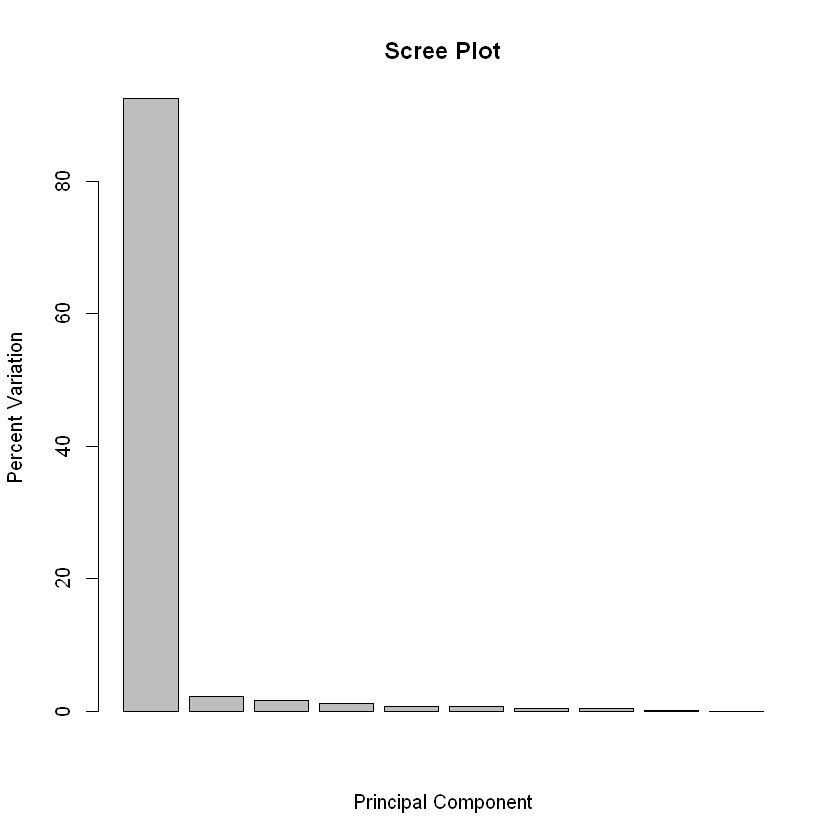

In [7]:
## make a scree plot

pca.var <- pca$sdev^2
pca.var.per <- round(pca.var/sum(pca.var)*100, 1)
 
barplot(pca.var.per, main="Scree Plot", xlab="Principal Component", ylab="Percent Variation") 

In [8]:
## now make a fancy looking plot that shows the PCs and the variation:

pca.data <- data.frame(Sample=rownames(pca$x), X=pca$x[,1], Y=pca$x[,2])
pca.data

,Sample,X,Y
,<chr>,<dbl>,<dbl>
wt1,wt1,-9.001425,0.59158724
wt2,wt2,-9.223056,1.10413318
wt3,wt3,-9.167645,1.00311749
wt4,wt4,-9.360262,-0.81593111
wt5,wt5,-8.847315,-1.93050515
ko1,ko1,9.076899,-0.80553779
ko2,ko2,8.988993,0.01270401
ko3,ko3,9.088680,-1.99017823
ko4,ko4,9.519533,0.01432061


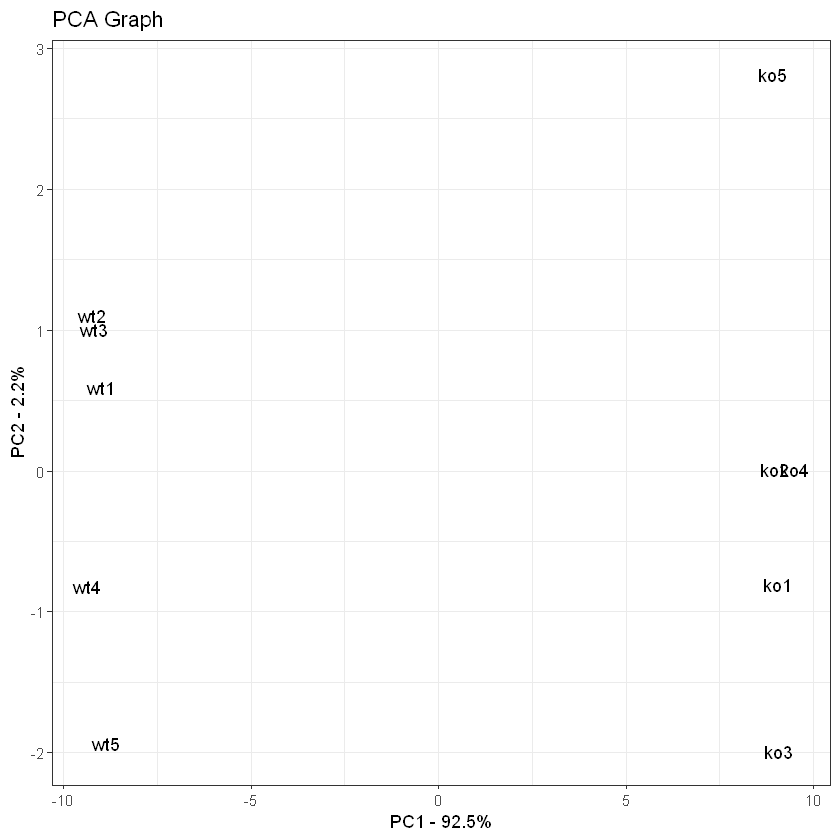

In [9]:
ggplot(data=pca.data, aes(x=X, y=Y, label=Sample)) +
  geom_text() +
  xlab(paste("PC1 - ", pca.var.per[1], "%", sep="")) +
  ylab(paste("PC2 - ", pca.var.per[2], "%", sep="")) +
  theme_bw() +
  ggtitle("PCA Graph")

In [10]:
## get the name of the top 10 measurements (genes) that contribute most to pc1.

loading_scores <- pca$rotation[,1]
gene_scores <- abs(loading_scores) ## get the magnitudes
gene_score_ranked <- sort(gene_scores, decreasing=TRUE)
top_10_genes <- names(gene_score_ranked[1:10])
 
top_10_genes ## show the names of the top 10 genes

[1] "gene58" "gene1"  "gene76" "gene19" "gene68" "gene16" "gene23" "gene2" 
 [9] "gene38" "gene63"

In [11]:
pca$rotation[top_10_genes,1] ## show the scores (and +/- sign)

gene58      gene1     gene76     gene19     gene68     gene16     gene23 
-0.1039589  0.1039282 -0.1039242 -0.1039197 -0.1039052  0.1038975  0.1038972 
     gene2     gene38     gene63 
 0.1038935  0.1038911 -0.1038845

In [12]:
## NOTE: Everything that follow is just bonus stuff.
## It simply demonstrates how to get the same
## results using "svd()" (Singular Value Decomposition) or using "eigen()" (Eigen Decomposition).

## Now let's do the same thing with svd()

## svd() returns three things
## v = the "rotation" that prcomp() returns, this is a matrix of eigenvectors
##     in other words, a matrix of loading scores
## u = this is similar to the "x" that prcomp() returns. In other words,
##     sum(the rotation * the original data), but compressed to the unit vector
##     You can spread it out by multiplying by "d"
## d = this is similar to the "sdev" value that prcomp() returns (and thus
##     related to the eigen values), but not
##     scaled by sample size in an unbiased way (ie. 1/(n-1)).
##     For prcomp(), sdev = sqrt(var) = sqrt(ss(fit)/(n-1))
##     For svd(), d = sqrt(ss(fit))

In [13]:
svd.stuff <- svd(scale(t(data.matrix), center=TRUE))

In [14]:
## calculate the PCs

svd.data <- data.frame(Sample=colnames(data.matrix),
  X=(svd.stuff$u[,1] * svd.stuff$d[1]),
  Y=(svd.stuff$u[,2] * svd.stuff$d[2]))
svd.data

Sample,X,Y
<chr>,<dbl>,<dbl>
wt1,-9.001425,0.59158724
wt2,-9.223056,1.10413318
wt3,-9.167645,1.00311749
wt4,-9.360262,-0.81593111
wt5,-8.847315,-1.93050515
ko1,9.076899,-0.80553779
ko2,8.988993,0.01270401
ko3,9.088680,-1.99017823
ko4,9.519533,0.01432061


In [15]:
## alternatively, we could compute the PCs with the eigen vectors and the original data

svd.pcs <- t(t(svd.stuff$v) %*% t(scale(t(data.matrix), center=TRUE)))
svd.pcs[,1:2] ## the first to principal components

wt1,-9.001425,0.59158724
wt2,-9.223056,1.10413318
wt3,-9.167645,1.00311749
wt4,-9.360262,-0.81593111
wt5,-8.847315,-1.93050515
ko1,9.076899,-0.80553779
ko2,8.988993,0.01270401
ko3,9.088680,-1.99017823
ko4,9.519533,0.01432061
ko5,8.925600,2.81628975


In [16]:
svd.df <- ncol(data.matrix) - 1
svd.var <- svd.stuff$d^2 / svd.df
svd.var.per <- round(svd.var/sum(svd.var)*100, 1)

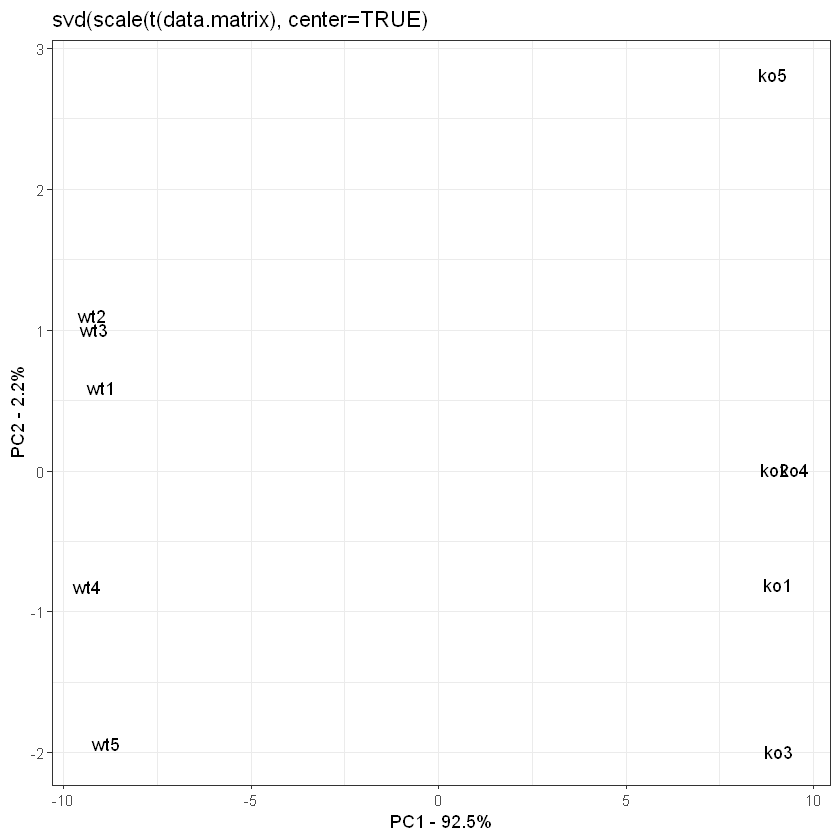

In [17]:
ggplot(data=svd.data, aes(x=X, y=Y, label=Sample)) +
  geom_text() +
  xlab(paste("PC1 - ", svd.var.per[1], "%", sep="")) +
  ylab(paste("PC2 - ", svd.var.per[2], "%", sep="")) +
  theme_bw() +
  ggtitle("svd(scale(t(data.matrix), center=TRUE)")

In [18]:
## Now let's do the same thing with eigen()

## eigen() returns two things...
## vectors = eigen vectors (vectors of loading scores)
##           NOTE: pcs = sum(loading scores * values for sample)
## values = eigen values

cov.mat <- cov(scale(t(data.matrix), center=TRUE))
dim(cov.mat)

[1] 100 100

In [19]:
## since the covariance matrix is symmetric, we can tell eigen() to just work on the lower triangle with "symmetric=TRUE"

eigen.stuff <- eigen(cov.mat, symmetric=TRUE)
dim(eigen.stuff$vectors)
head(eigen.stuff$vectors[,1:2])

[1] 100 100

-0.1039282,-0.0206918076
-0.1038935,0.0203023444
0.1038446,-0.0002305703
0.1031132,-0.0014324359
-0.0874727,-0.0103230168
0.1021676,0.0437383370


In [20]:
eigen.pcs <- t(t(eigen.stuff$vectors) %*% t(scale(t(data.matrix), center=TRUE)))
eigen.pcs[,1:2]

wt1,9.001425,0.59158724
wt2,9.223056,1.10413318
wt3,9.167645,1.00311749
wt4,9.360262,-0.81593111
wt5,8.847315,-1.93050515
ko1,-9.076899,-0.80553779
ko2,-8.988993,0.01270401
ko3,-9.088680,-1.99017823
ko4,-9.519533,0.01432061
ko5,-8.925600,2.81628975


In [21]:
eigen.data <- data.frame(Sample=rownames(eigen.pcs),
  X=(-1 * eigen.pcs[,1]), ## eigen() flips the X-axis in this case, so we flip it back
  Y=eigen.pcs[,2]) ## X axis will be PC1, Y axis will be PC2
eigen.data

,Sample,X,Y
,<chr>,<dbl>,<dbl>
wt1,wt1,-9.001425,0.59158724
wt2,wt2,-9.223056,1.10413318
wt3,wt3,-9.167645,1.00311749
wt4,wt4,-9.360262,-0.81593111
wt5,wt5,-8.847315,-1.93050515
ko1,ko1,9.076899,-0.80553779
ko2,ko2,8.988993,0.01270401
ko3,ko3,9.088680,-1.99017823
ko4,ko4,9.519533,0.01432061


In [22]:
eigen.var.per <- round(eigen.stuff$values/sum(eigen.stuff$values)*100, 1)

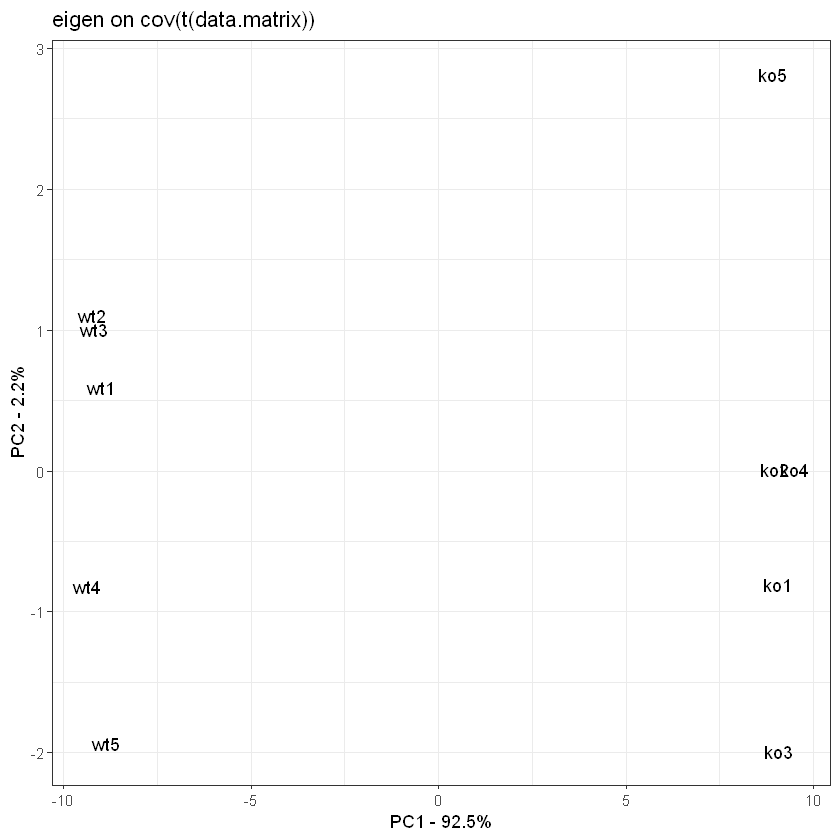

In [23]:
ggplot(data=eigen.data, aes(x=X, y=Y, label=Sample)) +
  geom_text() +
  xlab(paste("PC1 - ", eigen.var.per[1], "%", sep="")) +
  ylab(paste("PC2 - ", eigen.var.per[2], "%", sep="")) +
  theme_bw() +
  ggtitle("eigen on cov(t(data.matrix))")